# Analytical Report Netflix Movies

Netflix adalah aplikasi yang terus berkembang pesat dalam hal popularitas, program acara, dan kontennya.

Ibaratkan kita adalah seorang data scientist dari suatu media yang membahas tentang dunia perfilman. Anda diminta untuk melakukan analisis terkait dengan film-film yang tersedia di netflix dan dampak yang diberikan dari konten yang tersedia di netflix.

Di sini kita akan belajar membuat analytical report sesuai dengan objektif analisis film-film yang tersedia di netflix dan dampak yang diberikan dari konten yang tersedia di netflix. Objektif ini kita persempit ke:

- Film apakah yang paling populer, skor IMDb tertinggi, dan menguntungkan
- Film dengan genre apa yang paling banyak di netflix
- Siapakah target market netflix
- Apakah ada negara yang memiliki skor IMDb tertinggi melebihi Hollywood/Amerika
- Kapan konten netflix paling banyak dirilis
- Berapakah durasi umumnya konten film di netflix
- Seperti apakah outlier kolom finansial pada data
- Apakah ada hubungan linier antara pendapatan film dengan skor IMDb

Dataset yang digunakan:
Netflix = https://www.kaggle.com/datasets/shivamb/netflix-shows/download?datasetVersionNumber=5
IMDb: https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset/download?datasetVersionNumber=1

Kedua dataset yg sudah di-download dari url di atas di-import ke google drive masing-masing

# Mount Google Drive & Import Library

In [ ]:
# Mount google drive

from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib # modul visualisasi paling dasar
import matplotlib.pyplot as plt # fungsi untuk membuat visualiasi dari modul matplotlib
import seaborn as sns # modul visualisasi advance
import plotly # modul visualisasi interaktif
import plotly.express as px # fungsi plotly yang lebih sederhana dan lebih cepat
import numpy as np # modul pengolahan data numerik
import warnings # mengatur warning message

# setiap warning non error yang muncul akan dihide
warnings.filterwarnings('ignore')

# Load Dataset

### Netflix Dataset

Load dataset netflix yang sudah tersedia di google drive

In [ ]:
df_netflix=pd.read_csv('/content/drive/MyDrive/dataset/Project 2/netflix_titles.csv')

In [ ]:
data_netflix = df_netflix
data_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Kita ambil khusus data film saja pada dataset, kemudian kita bersihkan dari whitespace & diubah menjadi lowercase agar lebih rapih dalam pengolahannya

In [ ]:
data_netflix = data_netflix[data_netflix['type'] == 'Movie']

print(data_netflix.shape)

data_netflix['title'] = data_netflix['title'].str.lower()
data_netflix['title'] = data_netflix['title'].str.strip()
data_netflix['title']

(6029, 12)


0                   dick johnson is dead
6       my little pony: a new generation
7                                sankofa
9                           the starling
12                          je suis karl
                      ...               
8699                             zinzana
8700                              zodiac
8702                          zombieland
8703                                zoom
8704                              zubaan
Name: title, Length: 6029, dtype: object

### IMDb Dataset

Load dataset IMDb yang sudah tersedia di google drive

In [ ]:
df_imdb=pd.read_csv('/content/drive/MyDrive/dataset/Project 2/imdb_movies.csv')
data_imdb = df_imdb
data_imdb.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


Kita lakukan hal yang sama untuk judul film pada dataset IMDb seperti pada netflix

In [ ]:
data_imdb['orig_title'] = data_imdb['orig_title'].str.lower()
data_imdb['orig_title'] = data_imdb['orig_title'].str.strip()
data_imdb['orig_title']

0                                      creed iii
1                       avatar: the way of water
2                    the super mario bros. movie
3                                         momias
4                                      supercell
                          ...                   
10173                         20th century women
10174    delta force 2: the colombian connection
10175                           the russia house
10176           darkman ii: the return of durant
10177         the swan princess: a royal wedding
Name: orig_title, Length: 10178, dtype: object

# Data Preparation

### Join netflix & IMDb dataframe

Kita gabungkan dataframe netflix & IMDb untuk mendapatkan kolom "revenue", "budget", dan "score" dari IMDb untuk netflix

In [ ]:
df = data_netflix.merge(data_imdb[['date_x', 'orig_title', 'crew', 'orig_lang', 'budget_x', 'revenue', 'score', 'genre']],left_on='title',right_on='orig_title',how='inner')
df = df.drop(['orig_title'], axis=1)

Kita lakukan backup dengan cara assign dataframe hasil join "df" ke variabel baru "data"

In [ ]:
data = df
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_x,crew,orig_lang,budget_x,revenue,score,genre
0,s7,Movie,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,04/16/2022,"Vanessa Hudgens, Sunny Starscout (voice), Kimi...",English,38211149.2,4100000.0,78.0,"Animation, Family, Fantasy, Comedy, Adventure"
1,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,09/17/2021,"Melissa McCarthy, Lilly Maynard, Chris O'Dowd,...",English,100000000.0,369861963.8,71.0,Drama
2,s19,Movie,intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,"September 22, 2021",2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...,09/22/2021,"Freida Pinto, Meera Parsons, Logan Marshall-Gr...",English,82000000.0,618157116.2,60.0,Thriller
3,s24,Movie,go! go! cory carson: chrissy takes the wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...,09/21/2021,"Maisie Benson, , Paul Killam, , Kerry Gudjohns...",English,93000000.0,477850338.2,58.0,"Animation, Family"
4,s28,Movie,grown ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,06/24/2010,"Adam Sandler, Lenny Feder, Kevin James, Eric L...",English,75000000.0,272222420.0,64.0,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,s8791,Movie,you don't mess with the zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",2008,UR,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...,08/15/2008,"Adam Sandler, Zohan Dvir, Emmanuelle Chriqui, ...",English,90000000.0,204313400.0,57.0,"Comedy, Action"
1335,s8792,Movie,young adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,01/19/2012,"Charlize Theron, Mavis Gary, Patton Oswalt, Ma...",English,12000000.0,22750356.0,58.0,"Comedy, Drama"
1336,s8803,Movie,zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",05/17/2007,"Jake Gyllenhaal, Robert Graysmith, Mark Ruffal...",English,85000000.0,83080084.0,75.0,"Crime, Drama, Mystery, Thriller"
1337,s8805,Movie,zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,12/03/2009,"Woody Harrelson, Tallahassee, Jesse Eisenberg,...",English,23600000.0,102236596.0,73.0,"Comedy, Horror"


## Data Cleansing & Formating

Kita lakukan pengecekan jenis data, jumlah unik, jumlah missing value, dan persentase missing value dari dataframe hasil join.

Untuk itu kita buat suatu fungsi pengecekan yang dapat digunakan untuk aktivitas serupa di masa depan

In [ ]:
def df_diagnostics(data_frame):
    types = data_frame.dtypes
    distinct = data_frame.nunique()
    count_na = data_frame.isna().sum()
    percent_na = round((data_frame.isna().sum()/len(data))*100, 3)

    df_check = pd.concat([types, distinct, count_na, percent_na], axis=1)
    df_check.reset_index(level=0, inplace=True)
    df_check.rename(columns = {'index':'column', 0:'types', 1:'distinct', 2:'count_na', 3: 'percent_na'}, inplace = True)

    print('dimensi data: ', data.shape)

    return df_check

In [ ]:
df_diagnostics(data)

dimensi data:  (1339, 19)


,column,types,distinct,count_na,percent_na
0,show_id,object,1233,0,0.000
1,type,object,1,0,0.000
2,title,object,1233,0,0.000
3,director,object,930,8,0.597
4,cast,object,1213,21,1.568
5,country,object,250,32,2.390
6,date_added,object,572,0,0.000
7,release_year,int64,62,0,0.000
8,rating,object,12,0,0.000
9,duration,object,119,0,0.000


Terdapat 2 kolom yang memiliki missing value yaitu cast & country, kita simpan dahulu untuk analisis lanjutan.

### Formatting Date

Untuk kolom date_added dan date_x kita ubah dari object menjadi datetime untuk pengolahan data tanggal lebih lanjut.

Kita tambahkan kolom tahun dan bulan penambahan konten film ke netflix

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['date_x'] = pd.to_datetime(data['date_x'])
data['year_added'] = data['date_added'].dt.year.astype(int)
data['month_added'] = data['date_added'].dt.month.astype(int)
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,date_x,crew,orig_lang,budget_x,revenue,score,genre,year_added,month_added
0,s7,Movie,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,...,Equestria's divided. But a bright-eyed hero be...,2022-04-16,"Vanessa Hudgens, Sunny Starscout (voice), Kimi...",English,38211149.2,4100000.0,78.0,"Animation, Family, Fantasy, Comedy, Adventure",2021,9
1,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,...,A woman adjusting to life after a loss contend...,2021-09-17,"Melissa McCarthy, Lilly Maynard, Chris O'Dowd,...",English,100000000.0,369861963.8,71.0,Drama,2021,9
2,s19,Movie,intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,2021-09-22,2021,TV-14,94 min,...,After a deadly home invasion at a couple’s new...,2021-09-22,"Freida Pinto, Meera Parsons, Logan Marshall-Gr...",English,82000000.0,618157116.2,60.0,Thriller,2021,9
3,s24,Movie,go! go! cory carson: chrissy takes the wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,2021-09-21,2021,TV-Y,61 min,...,From arcade games to sled days and hiccup cure...,2021-09-21,"Maisie Benson, , Paul Killam, , Kerry Gudjohns...",English,93000000.0,477850338.2,58.0,"Animation, Family",2021,9
4,s28,Movie,grown ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,...,Mourning the loss of their beloved junior high...,2010-06-24,"Adam Sandler, Lenny Feder, Kevin James, Eric L...",English,75000000.0,272222420.0,64.0,Comedy,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,s8791,Movie,you don't mess with the zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,2019-09-01,2008,UR,113 min,...,An Israeli counterterrorism soldier with a sec...,2008-08-15,"Adam Sandler, Zohan Dvir, Emmanuelle Chriqui, ...",English,90000000.0,204313400.0,57.0,"Comedy, Action",2019,9
1335,s8792,Movie,young adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,...,When a divorced writer gets a letter from an o...,2012-01-19,"Charlize Theron, Mavis Gary, Patton Oswalt, Ma...",English,12000000.0,22750356.0,58.0,"Comedy, Drama",2019,11
1336,s8803,Movie,zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,"A political cartoonist, a crime reporter and a...",2007-05-17,"Jake Gyllenhaal, Robert Graysmith, Mark Ruffal...",English,85000000.0,83080084.0,75.0,"Crime, Drama, Mystery, Thriller",2019,11
1337,s8805,Movie,zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,Looking to survive in a world taken over by zo...,2009-12-03,"Woody Harrelson, Tallahassee, Jesse Eisenberg,...",English,23600000.0,102236596.0,73.0,"Comedy, Horror",2019,11


Kita cek apakah join kita ini sudah benar antara netflix dengan IMDb, karena kita tahu bahwa banyak film dengan nama yang sama tetapi ternyata itu adalah dua film berbeda. Sehingga perlu kita cek seharusnya tanggal rilis film tidak mungkin lebih baru daripada tanggal ditambahkannya konten ke netflix.

Kita buat dahulu kolom baru untuk menghitung selisih date_added dengan date_x

In [ ]:
data['release_day_gap'] = (data['date_added'] - data['date_x']).dt.days.astype(int)
data['release_day_gap']

0       -204
1          7
2          0
3          0
4       4106
        ... 
1334    4034
1335    2862
1336    4570
1337    3620
1338    4901
Name: release_day_gap, Length: 1339, dtype: int64

Kita cek apakah ada release_day_gap yang minus

In [ ]:
print((len(data[data['release_day_gap'] < 0])/len(data))*100, len(data[data['release_day_gap'] < 0]))
data[data['release_day_gap'] < 0].head()

3.7341299477221805 50


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,date_x,crew,orig_lang,budget_x,revenue,score,genre,year_added,month_added,release_day_gap
0,s7,Movie,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,...,2022-04-16,"Vanessa Hudgens, Sunny Starscout (voice), Kimi...",English,38211149.2,4100000.0,78.0,"Animation, Family, Fantasy, Comedy, Adventure",2021,9,-204
16,s87,Movie,prey,Thomas Sieben,"David Kross, Hanno Koffler, Maria Ehrich, Robe...",NaN,2021-09-10,2021,TV-MA,87 min,...,2022-08-05,"Amber Midthunder, Naru, Dakota Beavers, Taabe,...",English,65000000.0,0.0,78.0,"Thriller, Action, Science Fiction",2021,9,-329
34,s145,Movie,house party,Reginald Hudlin,"Christopher Reid, Christopher Martin, Robin Ha...",United States,2021-09-01,1990,R,104 min,...,2023-02-01,"Jacob Latimore, Kevin, Tosin Cole, Damon, Kare...",English,90544000.0,519948264.6,64.0,Comedy,2021,9,-518
108,s403,Movie,the last letter from your lover,Augustine Frizzell,"Shailene Woodley, Felicity Jones, Callum Turne...",United Kingdom,2021-07-23,2021,TV-MA,111 min,...,2021-08-06,"Shailene Woodley, Jennifer Stirling, Felicity ...",English,515001.4,1451974.0,75.0,"Drama, Romance",2021,7,-14
122,s465,Movie,gunpowder milkshake,Navot Papushado,"Karen Gillan, Lena Headey, Carla Gugino, Chloe...",NaN,2021-07-14,2021,R,115 min,...,2021-07-15,"Karen Gillan, Sam, Lena Headey, Scarlet, Chloe...",English,30000000.0,1015760.0,64.0,"Action, Crime, Thriller",2021,7,-1


Cek bentuk data release_day_gap lebih dari 0

In [ ]:
data[data['release_day_gap'] >= 0].head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,date_x,crew,orig_lang,budget_x,revenue,score,genre,year_added,month_added,release_day_gap
1,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,...,2021-09-17,"Melissa McCarthy, Lilly Maynard, Chris O'Dowd,...",English,100000000.0,369861963.8,71.0,Drama,2021,9,7
2,s19,Movie,intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,2021-09-22,2021,TV-14,94 min,...,2021-09-22,"Freida Pinto, Meera Parsons, Logan Marshall-Gr...",English,82000000.0,618157116.2,60.0,Thriller,2021,9,0
3,s24,Movie,go! go! cory carson: chrissy takes the wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,2021-09-21,2021,TV-Y,61 min,...,2021-09-21,"Maisie Benson, , Paul Killam, , Kerry Gudjohns...",English,93000000.0,477850338.2,58.0,"Animation, Family",2021,9,0
4,s28,Movie,grown ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,...,2010-06-24,"Adam Sandler, Lenny Feder, Kevin James, Eric L...",English,75000000.0,272222420.0,64.0,Comedy,2021,9,4106
5,s29,Movie,dark skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,...,2013-03-13,"Keri Russell, Lacy Barrett, Josh Hamilton, Dan...",English,3500000.0,27704111.0,63.0,"Science Fiction, Thriller, Horror",2021,9,3112
6,s30,Movie,paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,...,2013-10-03,"Liam Hemsworth, Adam Cassidy, Harrison Ford, J...",English,40000000.0,16340767.0,57.0,"Drama, Thriller",2021,9,2908
7,s39,Movie,birth of the dragon,George Nolfi,"Billy Magnussen, Ron Yuan, Qu Jingjing, Terry ...","China, Canada, United States",2021-09-16,2017,PG-13,96 min,...,2016-09-13,"Philip Ng Wan-Lung, Bruce Lee, Billy Magnussen...",English,31000000.0,7220490.0,58.0,"Action, Drama",2021,9,1829
8,s42,Movie,jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,...,1975-11-26,"Roy Scheider, Police Chief Martin Brody, Rober...",English,12000000.0,482947378.0,77.0,"Horror, Thriller, Adventure",2021,9,16731
9,s43,Movie,jaws 2,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,2021-09-16,1978,PG,116 min,...,1978-06-16,"Roy Scheider, Police Chief Martin Brody, Lorra...",English,20000000.0,208900376.0,60.0,"Horror, Thriller",2021,9,15798
10,s45,Movie,jaws: the revenge,Joseph Sargent,"Lorraine Gary, Lance Guest, Mario Van Peebles,...",United States,2021-09-16,1987,PG-13,91 min,...,1987-07-17,"Lorraine Gary, Ellen Brody, Lance Guest, Micha...",English,23000000.0,51881013.0,41.0,"Adventure, Thriller, Horror",2021,9,12480


### Cast & Crew

Ternyata selain release_day_gap, ada keanehan pada cast (pemeran film pada data netflix) yang berbeda dengan crew (pemeran film pada data IMDb) meskipun nama film sama dan release_day_gap >= 0, sehingga perlu kita cek juga kesamaan cast & crew

Kolom cast & crew ini berbentuk string tetapi di dalamnya berisi kumpulan nama/string, disamping itu biasanya pemeran utama dimunculkan pada paling awal di kolom cast & crew. Menggunakan logika itu kita dapat memfilter pemeran utama pada cast & crew itu sama

In [ ]:
data = data[data['release_day_gap'] >= 0]
data = data[data['cast'].str.split(',').str[0].str.lower().str.strip() == data['crew'].str.split(',').str[0].str.lower().str.strip()]
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,date_x,crew,orig_lang,budget_x,revenue,score,genre,year_added,month_added,release_day_gap
1,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,...,2021-09-17,"Melissa McCarthy, Lilly Maynard, Chris O'Dowd,...",English,100000000.0,369861963.8,71.0,Drama,2021,9,7
2,s19,Movie,intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,2021-09-22,2021,TV-14,94 min,...,2021-09-22,"Freida Pinto, Meera Parsons, Logan Marshall-Gr...",English,82000000.0,618157116.2,60.0,Thriller,2021,9,0
3,s24,Movie,go! go! cory carson: chrissy takes the wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,2021-09-21,2021,TV-Y,61 min,...,2021-09-21,"Maisie Benson, , Paul Killam, , Kerry Gudjohns...",English,93000000.0,477850338.2,58.0,"Animation, Family",2021,9,0
4,s28,Movie,grown ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,...,2010-06-24,"Adam Sandler, Lenny Feder, Kevin James, Eric L...",English,75000000.0,272222420.0,64.0,Comedy,2021,9,4106
5,s29,Movie,dark skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,...,2013-03-13,"Keri Russell, Lacy Barrett, Josh Hamilton, Dan...",English,3500000.0,27704111.0,63.0,"Science Fiction, Thriller, Horror",2021,9,3112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,s8767,Movie,xxx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,2019-01-01,2002,PG-13,124 min,...,2002-10-03,"Vin Diesel, Xander Cage, Asia Argento, Yelena,...",English,70000000.0,267200000.0,59.0,"Action, Adventure, Thriller",2019,1,5934
1332,s8768,Movie,xxx: state of the union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,2019-01-01,2005,PG-13,101 min,...,2005-04-28,"Ice Cube, Darius Stone / xXx, Samuel L. Jackso...",English,60000000.0,71073932.0,50.0,"Action, Adventure, Crime, Mystery, Thriller",2019,1,4996
1334,s8791,Movie,you don't mess with the zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,2019-09-01,2008,UR,113 min,...,2008-08-15,"Adam Sandler, Zohan Dvir, Emmanuelle Chriqui, ...",English,90000000.0,204313400.0,57.0,"Comedy, Action",2019,9,4034
1335,s8792,Movie,young adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,...,2012-01-19,"Charlize Theron, Mavis Gary, Patton Oswalt, Ma...",English,12000000.0,22750356.0,58.0,"Comedy, Drama",2019,11,2862


Dari hasil pengecekan terdapat 980 rows tersisa dari kedua dataframe yang di-join, kemudia kita lakukan pengecekkan diagnostik kembali

In [ ]:
df_diagnostics(data)

dimensi data:  (968, 22)


,column,types,distinct,count_na,percent_na
0,show_id,object,949,0,0.000
1,type,object,1,0,0.000
2,title,object,949,0,0.000
3,director,object,727,5,0.517
4,cast,object,949,0,0.000
5,country,object,196,19,1.963
6,date_added,datetime64[ns],459,0,0.000
7,release_year,int64,59,0,0.000
8,rating,object,12,0,0.000
9,duration,object,109,0,0.000


Karena hanya 18 row yang memiliki missing value, alangkah baiknya kita dari dataframe

In [ ]:
data = data.dropna(axis = 0)

df_diagnostics(data)

dimensi data:  (944, 22)


,column,types,distinct,count_na,percent_na
0,show_id,object,925,0,0.0
1,type,object,1,0,0.0
2,title,object,925,0,0.0
3,director,object,710,0,0.0
4,cast,object,925,0,0.0
5,country,object,196,0,0.0
6,date_added,datetime64[ns],444,0,0.0
7,release_year,int64,59,0,0.0
8,rating,object,12,0,0.0
9,duration,object,106,0,0.0


### Firat Country

Dari dataframe yang kita miliki ternyata kolom country ini tidak hanya memiliki satu nama negara, sehingga kita perlu ambil negara yang muncul paling awal

In [ ]:
data['first_country'] = data['country'].apply(lambda x: x.split(",")[0])
data['first_country'].head()


data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,crew,orig_lang,budget_x,revenue,score,genre,year_added,month_added,release_day_gap,first_country
1,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,...,"Melissa McCarthy, Lilly Maynard, Chris O'Dowd,...",English,100000000.0,369861963.8,71.0,Drama,2021,9,7,United States
4,s28,Movie,grown ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,...,"Adam Sandler, Lenny Feder, Kevin James, Eric L...",English,75000000.0,272222420.0,64.0,Comedy,2021,9,4106,United States
5,s29,Movie,dark skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,...,"Keri Russell, Lacy Barrett, Josh Hamilton, Dan...",English,3500000.0,27704111.0,63.0,"Science Fiction, Thriller, Horror",2021,9,3112,United States
6,s30,Movie,paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,...,"Liam Hemsworth, Adam Cassidy, Harrison Ford, J...",English,40000000.0,16340767.0,57.0,"Drama, Thriller",2021,9,2908,United States
8,s42,Movie,jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,...,"Roy Scheider, Police Chief Martin Brody, Rober...",English,12000000.0,482947378.0,77.0,"Horror, Thriller, Adventure",2021,9,16731,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,s8767,Movie,xxx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,2019-01-01,2002,PG-13,124 min,...,"Vin Diesel, Xander Cage, Asia Argento, Yelena,...",English,70000000.0,267200000.0,59.0,"Action, Adventure, Thriller",2019,1,5934,United States
1332,s8768,Movie,xxx: state of the union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,2019-01-01,2005,PG-13,101 min,...,"Ice Cube, Darius Stone / xXx, Samuel L. Jackso...",English,60000000.0,71073932.0,50.0,"Action, Adventure, Crime, Mystery, Thriller",2019,1,4996,United States
1334,s8791,Movie,you don't mess with the zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,2019-09-01,2008,UR,113 min,...,"Adam Sandler, Zohan Dvir, Emmanuelle Chriqui, ...",English,90000000.0,204313400.0,57.0,"Comedy, Action",2019,9,4034,United States
1335,s8792,Movie,young adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,...,"Charlize Theron, Mavis Gary, Patton Oswalt, Ma...",English,12000000.0,22750356.0,58.0,"Comedy, Drama",2019,11,2862,United States


### Users Demographic

dataframe yang kita miliki memiliki kolom rating yang berisi kode usia user untuk film yang disediakan. Pemetannya menggunakan sistem rating amerika, agar lebih relevan perlu kita ubah ke kelompok usia.

In [ ]:
ratings_ages = {
'TV-PG': 'Older Kids',
'TV-MA': 'Adults',
'TV-Y7-FV': 'Older Kids',
'TV-Y7': 'Older Kids',
'TV-14': 'Teens',
'R': 'Adults',
'TV-Y': 'Kids',
'NR': 'Adults',
'PG-13': 'Teens',
'TV-G': 'Kids',
'PG': 'Older Kids',
'G': 'Kids',
'UR': 'Adults',
'NC-17': 'Adults'
}


data['target_ages'] = data['rating'].replace(ratings_ages)
data['target_ages'].unique()


data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,orig_lang,budget_x,revenue,score,genre,year_added,month_added,release_day_gap,first_country,target_ages
1,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,...,English,100000000.0,369861963.8,71.0,Drama,2021,9,7,United States,Teens
4,s28,Movie,grown ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,...,English,75000000.0,272222420.0,64.0,Comedy,2021,9,4106,United States,Teens
5,s29,Movie,dark skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,...,English,3500000.0,27704111.0,63.0,"Science Fiction, Thriller, Horror",2021,9,3112,United States,Teens
6,s30,Movie,paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,...,English,40000000.0,16340767.0,57.0,"Drama, Thriller",2021,9,2908,United States,Teens
8,s42,Movie,jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,...,English,12000000.0,482947378.0,77.0,"Horror, Thriller, Adventure",2021,9,16731,United States,Older Kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,s8767,Movie,xxx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,2019-01-01,2002,PG-13,124 min,...,English,70000000.0,267200000.0,59.0,"Action, Adventure, Thriller",2019,1,5934,United States,Teens
1332,s8768,Movie,xxx: state of the union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,2019-01-01,2005,PG-13,101 min,...,English,60000000.0,71073932.0,50.0,"Action, Adventure, Crime, Mystery, Thriller",2019,1,4996,United States,Teens
1334,s8791,Movie,you don't mess with the zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,2019-09-01,2008,UR,113 min,...,English,90000000.0,204313400.0,57.0,"Comedy, Action",2019,9,4034,United States,Adults
1335,s8792,Movie,young adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,...,English,12000000.0,22750356.0,58.0,"Comedy, Drama",2019,11,2862,United States,Adults


### Genre & Duration

Untuk genre karena memang 1 film dapat masuk ke beberapa genre sekaligus sehingga kita perlu reformat saja yang tadinya kolom tersebut berbentuk string menjadi list of string untuk memudahkan pemrosesan di masa depan.

Kita tambahkan 1 kolom duration_min untuk mengambil angka durasi film yang sebelumnya berbentuk string

In [ ]:
data['genre'] = data['listed_in'].apply(lambda x : x.replace(' ,',',').replace(', ',',').split(','))
data['duration_min'] = data['duration'].str.extract('(\d+)').astype(int)

data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,budget_x,revenue,score,genre,year_added,month_added,release_day_gap,first_country,target_ages,duration_min
1,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,...,100000000.0,369861963.8,71.0,"[Comedies, Dramas]",2021,9,7,United States,Teens,104
4,s28,Movie,grown ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,...,75000000.0,272222420.0,64.0,[Comedies],2021,9,4106,United States,Teens,103
5,s29,Movie,dark skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,...,3500000.0,27704111.0,63.0,"[Horror Movies, Sci-Fi & Fantasy]",2021,9,3112,United States,Teens,97
6,s30,Movie,paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,...,40000000.0,16340767.0,57.0,[Thrillers],2021,9,2908,United States,Teens,106
8,s42,Movie,jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,...,12000000.0,482947378.0,77.0,"[Action & Adventure, Classic Movies, Dramas]",2021,9,16731,United States,Older Kids,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,s8767,Movie,xxx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,2019-01-01,2002,PG-13,124 min,...,70000000.0,267200000.0,59.0,"[Action & Adventure, Sports Movies]",2019,1,5934,United States,Teens,124
1332,s8768,Movie,xxx: state of the union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,2019-01-01,2005,PG-13,101 min,...,60000000.0,71073932.0,50.0,[Action & Adventure],2019,1,4996,United States,Teens,101
1334,s8791,Movie,you don't mess with the zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,2019-09-01,2008,UR,113 min,...,90000000.0,204313400.0,57.0,"[Action & Adventure, Comedies]",2019,9,4034,United States,Adults,113
1335,s8792,Movie,young adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,...,12000000.0,22750356.0,58.0,"[Comedies, Dramas, Independent Movies]",2019,11,2862,United States,Adults,94


# Save Dataframe to XLSX

Agar data hasil pengolahan kita tidak hilang, kita backup ke xlsx agar dapat digunakan kembali sewaktu-waktu

In [ ]:
data_backup = data

In [ ]:
df_netflix[df_netflix['listed_in'].str.contains("LGBT", na = False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
from google.colab import drive

# saving the excel
data_backup.to_excel("clean_netflix_imdb.xlsx", index=False)
!cp clean_netflix_imdb.xlsx "/content/drive/MyDrive/Dataset"

cp: not writing through dangling symlink '/content/drive/MyDrive/Dataset'


# EDA

Kita akan menjawab pertanyaan-pertanyaan yang telah ditentukan di awal sesi dengan exploratory data analysis, untuk kita load data yang telah disimpan tadi

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/dataset/clean_netflix_imdb.xlsx')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,budget_x,revenue,score,genre,year_added,month_added,release_day_gap,first_country,target_ages,duration_min
0,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,...,100000000.0,369861963.8,71,"['Comedies', 'Dramas']",2021,9,7,United States,Teens,104
1,s28,Movie,grown ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,...,75000000.0,272222420.0,64,['Comedies'],2021,9,4106,United States,Teens,103
2,s29,Movie,dark skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,...,3500000.0,27704111.0,63,"['Horror Movies', 'Sci-Fi & Fantasy']",2021,9,3112,United States,Teens,97
3,s30,Movie,paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,...,40000000.0,16340767.0,57,['Thrillers'],2021,9,2908,United States,Teens,106
4,s42,Movie,jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,...,12000000.0,482947378.0,77,"['Action & Adventure', 'Classic Movies', 'Dram...",2021,9,16731,United States,Older Kids,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,s8767,Movie,xxx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,2019-01-01,2002,PG-13,124 min,...,70000000.0,267200000.0,59,"['Action & Adventure', 'Sports Movies']",2019,1,5934,United States,Teens,124
940,s8768,Movie,xxx: state of the union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,2019-01-01,2005,PG-13,101 min,...,60000000.0,71073932.0,50,['Action & Adventure'],2019,1,4996,United States,Teens,101
941,s8791,Movie,you don't mess with the zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,2019-09-01,2008,UR,113 min,...,90000000.0,204313400.0,57,"['Action & Adventure', 'Comedies']",2019,9,4034,United States,Adults,113
942,s8792,Movie,young adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,...,12000000.0,22750356.0,58,"['Comedies', 'Dramas', 'Independent Movies']",2019,11,2862,United States,Adults,94


In [ ]:
# konversi kolom ke datetime
data['date_added'] = pd.to_datetime(data['date_added'])
data['date_x'] = pd.to_datetime(data['date_x'])

# tambahan kolom
data['year_added'] = data['date_added'].dt.year.astype(int)
data['month_added'] = data['date_added'].dt.month.astype(int)

data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,budget_x,revenue,score,genre,year_added,month_added,release_day_gap,first_country,target_ages,duration_min
0,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,...,100000000.0,369861963.8,71,"['Comedies', 'Dramas']",2021,9,7,United States,Teens,104
1,s28,Movie,grown ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,...,75000000.0,272222420.0,64,['Comedies'],2021,9,4106,United States,Teens,103
2,s29,Movie,dark skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,...,3500000.0,27704111.0,63,"['Horror Movies', 'Sci-Fi & Fantasy']",2021,9,3112,United States,Teens,97
3,s30,Movie,paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,...,40000000.0,16340767.0,57,['Thrillers'],2021,9,2908,United States,Teens,106
4,s42,Movie,jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,...,12000000.0,482947378.0,77,"['Action & Adventure', 'Classic Movies', 'Dram...",2021,9,16731,United States,Older Kids,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,s8767,Movie,xxx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,2019-01-01,2002,PG-13,124 min,...,70000000.0,267200000.0,59,"['Action & Adventure', 'Sports Movies']",2019,1,5934,United States,Teens,124
940,s8768,Movie,xxx: state of the union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,2019-01-01,2005,PG-13,101 min,...,60000000.0,71073932.0,50,['Action & Adventure'],2019,1,4996,United States,Teens,101
941,s8791,Movie,you don't mess with the zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,2019-09-01,2008,UR,113 min,...,90000000.0,204313400.0,57,"['Action & Adventure', 'Comedies']",2019,9,4034,United States,Adults,113
942,s8792,Movie,young adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,...,12000000.0,22750356.0,58,"['Comedies', 'Dramas', 'Independent Movies']",2019,11,2862,United States,Adults,94


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          944 non-null    object        
 1   type             944 non-null    object        
 2   title            944 non-null    object        
 3   director         944 non-null    object        
 4   cast             944 non-null    object        
 5   country          944 non-null    object        
 6   date_added       944 non-null    datetime64[ns]
 7   release_year     944 non-null    int64         
 8   rating           944 non-null    object        
 9   duration         944 non-null    object        
 10  listed_in        944 non-null    object        
 11  description      944 non-null    object        
 12  date_x           944 non-null    datetime64[ns]
 13  crew             944 non-null    object        
 14  orig_lang        944 non-null    object   

## Color Palette

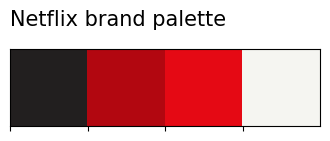

In [ ]:
# Membuat palet warna untuk chart-chart yang akan dibuat
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontsize=15,y=1.2)
plt.show()

## Film

Di sini kita akan mulai dengan melihat film apa yang paling populer, mahal, dan disukai oleh pemirsa

### Film Terpopuler

Untuk mengetahui film terpopuler maka kita dapat menggunakan pendekatan dari kolom 'revenue', karena secara logika semakin banyak pendapatan maka semakin tinggi popularitasnya

In [ ]:
data[['title', 'revenue']].sort_values(['revenue'], ascending = False).set_index('title')['revenue'][:20]

title
avengers: infinity war                                2.048360e+09
black panther                                         1.336494e+09
doom: annihilation                                    1.168753e+09
vivo                                                  1.139732e+09
como caído del cielo                                  1.135762e+09
the lord of the rings: the return of the king         1.121387e+09
feel the beat                                         1.079234e+09
david attenborough: a life on our planet              1.075683e+09
the last thing he wanted                              1.052163e+09
america: the motion picture                           1.039634e+09
hey arnold! the jungle movie                          9.457198e+08
the lord of the rings: the two towers                 9.191488e+08
spider-man 3                                          8.948602e+08
the dig                                               8.876688e+08
alien warfare                                         8.

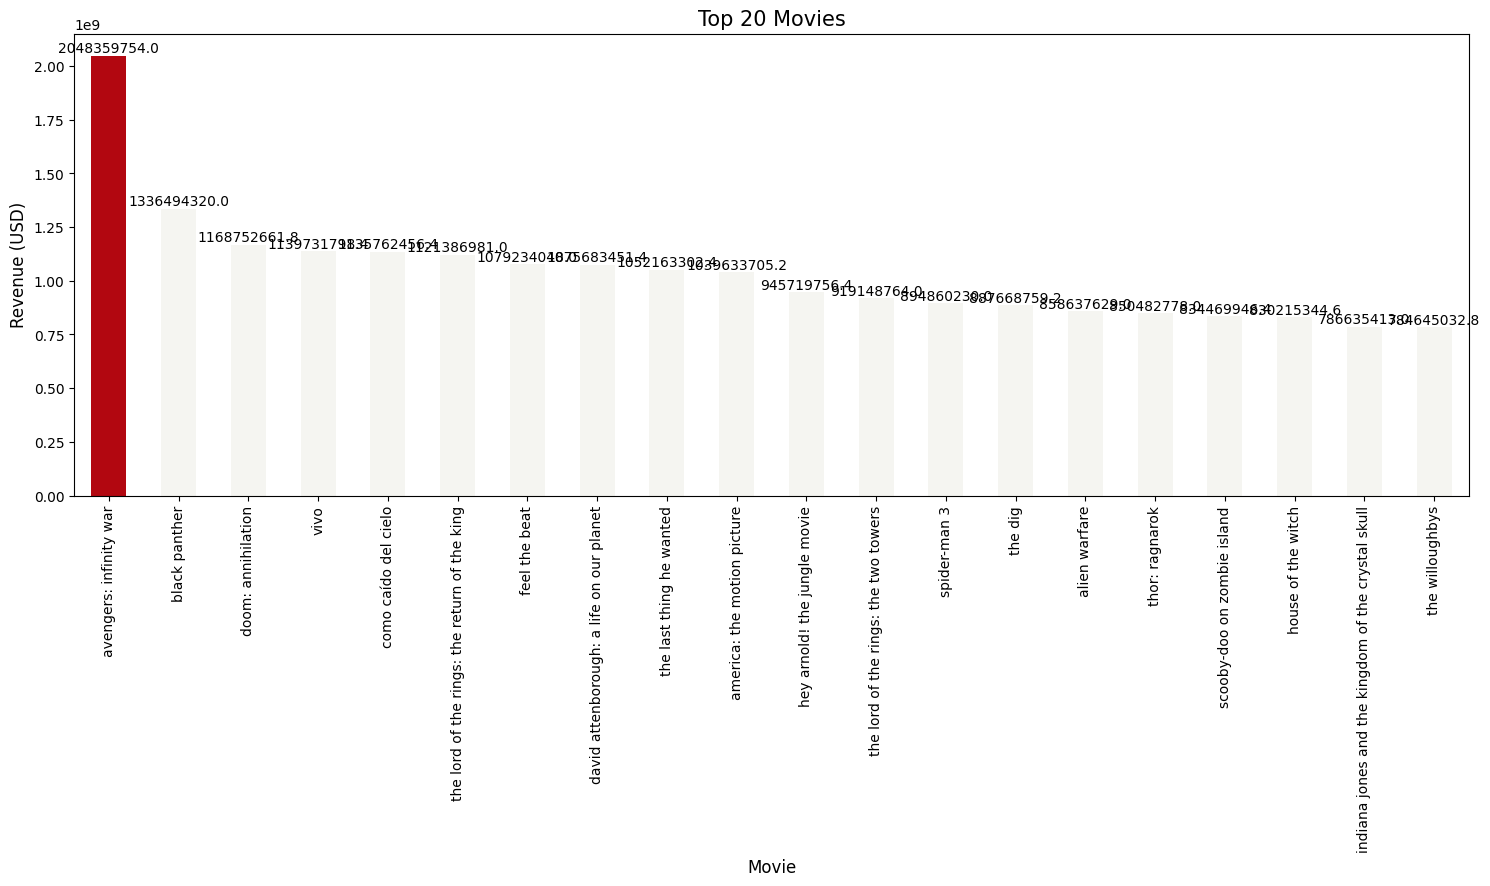

In [ ]:
color_map = ['#f5f5f1' for _ in range(20)]
color_map[0] =  '#b20710' # color highlight

labels = data[['title', 'revenue']].sort_values(['revenue'], ascending = False).set_index('title')['revenue'][:20]

ax = labels.plot(kind='bar', figsize=(18, 6), rot = 90, color = color_map)

ax.set_title('Top 20 Movies', fontsize = 15)
ax.set_xlabel("Movie", fontsize=12)
ax.set_ylabel("Revenue (USD)", fontsize=12)

rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 10, label,
            ha='center', va='bottom')

plt.show()

Menggunakan matplotlib untuk memvisualisasikan label pada tiap bar cukup rumit karena harus menambahkan sendiri loop nilai sumbu y ke masing-masing sumbu x, kita coba buat bar chart menggunakan seaborn

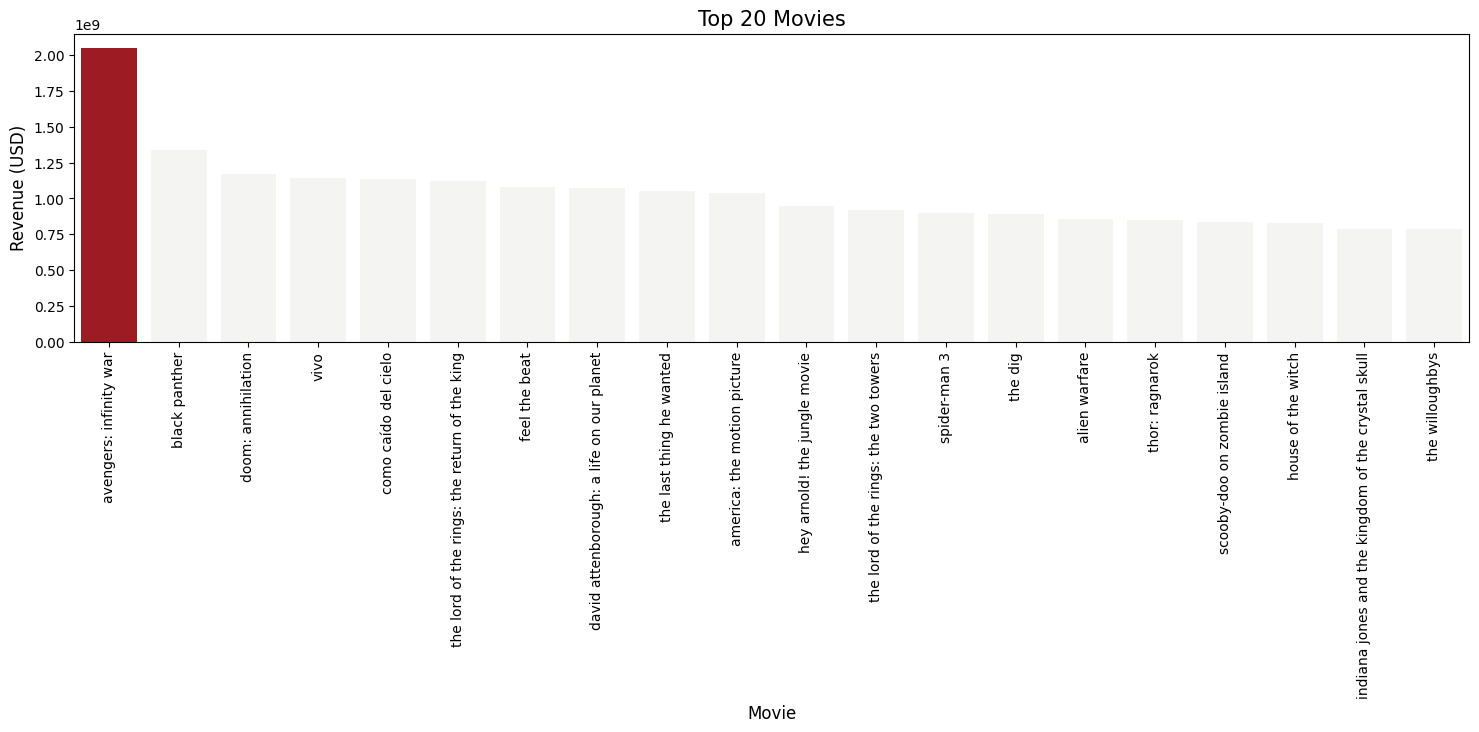

In [ ]:
color_map = ['#f5f5f1' for _ in range(20)]
color_map[0] =  '#b20710' # color highlight

# Set your custom color palette
sns.set_palette(sns.color_palette(color_map))

labels = data[['title', 'revenue']].sort_values(['revenue'], ascending = False)[:20]

ax = sns.barplot(labels,
             y = "revenue",
             x = "title"
            )

plt.xticks(rotation = 90)

ax.figure.set_size_inches(18,4)
ax.set_title('Top 20 Movies', fontsize = 15)
ax.set_xlabel("Movie", fontsize=12)
ax.set_ylabel("Revenue (USD)", fontsize=12)

# rects = ax.patches

# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width() / 2, height + 10, label,
#             ha='center', va='bottom')

plt.show()

dan ternyata sama rumitnya, karena seaborn pada dasarnya seaborn dibangun atas dasar modul dari matplotlib sehingga keduanya dapat jalan berdampingan dalam satu fungsi. Kita coba menggunakan plotly

In [ ]:
fig = px.bar(data[['title', 'revenue']].sort_values(['revenue'], ascending = False)[:20],
             y = "revenue",
             x = "title",
             text_auto='.s',
             title = 'Top 20 Movies by Revenue',
             color = "title",
             color_discrete_sequence = ['#b20710'] + ['#f5f5f1'] * 19,
             height=700
             )

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(xaxis_tickangle = 270, showlegend=False, title_x=0.5)

fig.show()

Ternyata menggunakan plotly lebih ringkas dalam penulisan code serta plot yang interaktif menjadi lebih menarik

Kita lihat film paling populer yang ada di netflix adalah infinity war, menariknya film ini ternyata tidak ekslusif hanya untuk platform streaming rivalnya yaitu disney + akan tetapi pernah muncul di netflix pula.

### Film Skor Tertinggi

Kita lihat film terbaik berdasarkan skor imdb

In [ ]:
fig = px.bar(data[['title', 'score']].sort_values(['score'], ascending = False)[:20],
             y = "score",
             x = "title",
             text_auto='.s',
             title = 'Top 20 Movies by Score',
             color = "title",
             color_discrete_sequence = ['#b20710'] + ['#f5f5f1'] * 19,
             height=700
             )

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(xaxis_tickangle = 270, showlegend=False, title_x=0.5)

fig.show()

Dari skor IMDb, film terbaik adalah Schindler's list, jika kita lihat Avengers: Infinity War meskipun meraih pendapatan tertinggi atau bisa dibilang film terpopuler ternyata hanya meraih peringkat ke 13

### Film Termahal

Selanjutnya kita lihat film termahal berdasarkan budget yang dikeluarkan

In [ ]:
fig = px.bar(data[['title', 'budget_x']].sort_values(['budget_x'], ascending = False)[:20],
             y = 'budget_x',
             x = "title",
             text_auto='.s',
             title = 'Top 20 Most Expensive Movies',
             color = "title",
             color_discrete_sequence = ['#b20710'] + ['#f5f5f1'] * 19,
             height=700
             )

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(xaxis_tickangle = 270, showlegend=False, title_x=0.5)

fig.show()

Film termahal adalah Avengers: Infinity War, jika dilihat dari popularitasnya maka budget yang dihasilkan ini selangkah memberikan hasil yang baik untuk film tersebut, lantas seberapa menguntungkan film ini?

### Film paling menguntungkan

Jika kita lihat budget film yang sangat besar perlu dipikirkan aspek bisnis dari hasil produksinya. Oleh karena itu kita hitung keuntungan yang dihasilkan dari film tersebut dengan cara menghitung selisih 'revenue' dengan 'budget_x'

In [ ]:
data['profit'] = data['revenue'] - data['budget_x']

In [ ]:
fig = px.bar(data[['title', 'profit']].sort_values(['profit'], ascending = False)[:20],
             y = 'profit',
             x = "title",
             text_auto='.s',
             title = 'Top 20 Most Profitable Movies',
             color = "title",
             color_discrete_sequence = ['#b20710'] + ['#f5f5f1'] * 19,
             height=700
             )

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(xaxis_tickangle = 270, showlegend=False, title_x=0.5)

fig.show()

## Target Market

Target market dapat dilihat dari genre film yang tersedia dan juga demografi yang dituju

### Genre Terbanyak

Kita ingin melihat jenis konten seperti apa yang tersedia di netflix

In [ ]:
data['genre'].value_counts()

['Action & Adventure']                                              82
['Children & Family Movies', 'Comedies']                            70
['Action & Adventure', 'Sci-Fi & Fantasy']                          46
['Comedies', 'Romantic Movies']                                     40
['Dramas']                                                          39
                                                                    ..
['Classic Movies', 'Music & Musicals']                               1
['Independent Movies', 'Thrillers']                                  1
['Children & Family Movies', 'Comedies', 'Faith & Spirituality']     1
['Dramas', 'International Movies', 'Music & Musicals']               1
['Action & Adventure', 'Sports Movies']                              1
Name: genre, Length: 152, dtype: int64

In [ ]:
# Menggunakan apply dan lambda untuk mengonversi string menjadi list
data['genre'] = data['genre'].apply(lambda x: eval(x) if isinstance(x, str) else x)

data['genre']

0                                [Comedies, Dramas]
1                                        [Comedies]
2                 [Horror Movies, Sci-Fi & Fantasy]
3                                       [Thrillers]
4      [Action & Adventure, Classic Movies, Dramas]
                           ...                     
939             [Action & Adventure, Sports Movies]
940                            [Action & Adventure]
941                  [Action & Adventure, Comedies]
942          [Comedies, Dramas, Independent Movies]
943            [Children & Family Movies, Comedies]
Name: genre, Length: 944, dtype: object

In [ ]:
# mengeluarkan isi dalam list untuk menjadi dataframe genre
genres = pd.DataFrame([(index, value) for (index, values) in
                      data['genre'].iteritems() for value in values],
                     columns=['kolom', 'genre']).drop('kolom', axis = 1)

genres

,genre
0,Comedies
1,Dramas
2,Comedies
3,Horror Movies
4,Sci-Fi & Fantasy
...,...
1913,Comedies
1914,Dramas
1915,Independent Movies
1916,Children & Family Movies


In [ ]:
# grouping genre baru
genre_group = genres.groupby('genre')['genre'].count().reset_index(name='counts')

genre_group

,genre,counts
0,Action & Adventure,288
1,Children & Family Movies,160
2,Classic Movies,53
3,Comedies,305
4,Cult Movies,39
5,Documentaries,12
6,Dramas,334
7,Faith & Spirituality,17
8,Horror Movies,96
9,Independent Movies,103


In [ ]:
# Menggunakan apply dan lambda untuk mengonversi string menjadi list
data['genre'] = data['genre'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# mengeluarkan isi dalam list untuk menjadi dataframe genre
genres = pd.DataFrame([(index, value) for (index, values) in
                      data['genre'].iteritems() for value in values],
                     columns=['kolom', 'genre']).drop('kolom', axis = 1)

# grouping genre baru
genre_group = genres.groupby('genre')['genre'].count().reset_index(name='counts')

genre_group

,genre,counts
0,Action & Adventure,288
1,Children & Family Movies,160
2,Classic Movies,53
3,Comedies,305
4,Cult Movies,39
5,Documentaries,12
6,Dramas,334
7,Faith & Spirituality,17
8,Horror Movies,96
9,Independent Movies,103


Simpan genre groupby ke xlsx file

In [ ]:
# saving the excel
genre_group.to_excel("genre_group.xlsx", index=False)
!cp genre_group.xlsx "drive/My Drive/Dataset"

cp: not writing through dangling symlink 'drive/My Drive/Dataset'


In [ ]:
fig = px.pie(genre_group,
             values = genre_group.counts,
             names = genre_group.genre,
             color = genre_group.genre,
             )
fig

Drama adalah jenis film terbanyak yang tersedia di netflix dan disusul oleh film komedi dan film aksi petualangan.

Selain dalam bentuk pie chart kita dapat menampilkan analisis ini dalam bentuk wordcloud.

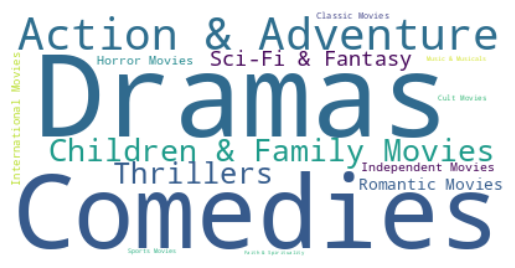

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

genres_list = list(genres['genre'])

genres_l = Counter(genres_list)

wordcloud = WordCloud(max_words=1000000,background_color="white").generate_from_frequencies(genres_l)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Fungsi utama wordcloud adalah menunjukkan kemunculan suatu kata dalam bentuk tulisan, kita coba lihat bentuk wordcloud untuk nama film

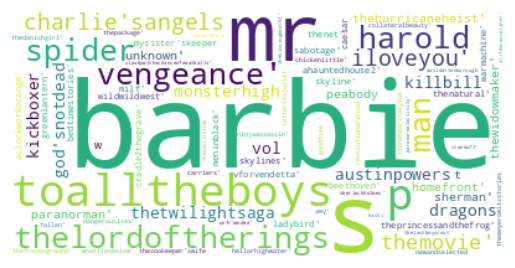

In [ ]:
films = list(data['title'])
film = []

for i in films:
    i=list(i.split(','))
    for j in i:
        film.append(j.replace(' ',""))

film = Counter(film)

text = list(set(film))

#assigning shape to the word cloud
wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Dari wordcloud di atas uniknya film dengan kata Barbie memiliki jumlah film terbanyak di netflix.

Bagaimana dengan film di Indonesia ya?

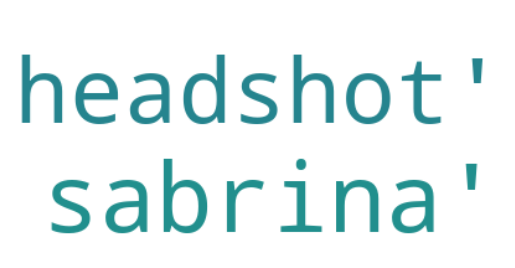

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

film_indonesia=list(data.loc[data['first_country'] == 'Indonesia', 'title'])
film_indo=[]

for i in film_indonesia:
    i=list(i.split(','))
    for j in i:
        film_indo.append(j.replace(' ',""))

film = Counter(film_indo)

text = list(set(film_indo))

#assigning shape to the word cloud
wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ternyata hanya ada 2 film Indonesia dan masing-masing hanya menggunakan 1 kata pada judul film

### Demographic Target

Kita lihat seperti apa distribusi demografi yang dituju oleh netflix, hal ini dapat kita lihat dari movie rating system (SU, remaja, dll).

In [ ]:
fig = px.pie(pd.DataFrame(data['target_ages'].value_counts()),
             values = pd.DataFrame(data['target_ages'].value_counts()).target_ages,
             names = pd.DataFrame(data['target_ages'].value_counts()).index,
             color = pd.DataFrame(data['target_ages'].value_counts()).index,
             color_discrete_map = {"Adults": "#221f1f",
                                    "Teens": "#b20710",
                                    "Older Kids": "#e50914",
                                    "Kids": "#f5f5f1"
                                }
             )
fig

Netflix memiliki target penonton terbesar pada orang-orang dewasa, yang dimana sejalan dengan model bisnis netflix yang dimana tidak murah untuk mendaftar penggunaan layanan netflix

## Country Origin

### Movie Score by Country

Selanjutnya kita coba analisis sebaran score film di tiap negara.

Sebelum kita membuat visualisasinya, kita akan membuat dataframe group agar lebih mudah ke depannya untuk digunakan

In [ ]:
# country_group = data.groupby(["first_country"]).agg(
#     # total_movie = ('title', 'count'),
#     # total_revenue = ('revenue', 'sum'), avg_revenue = ('revenue', 'mean'),
#     # total_budget = ('budget_x', 'sum'), avg_budget = ('budget_x', 'mean'),
#     avg_score = ('score', 'mean'),
#     # max_score = ('score', 'max')
#     ).sort_values("total_movie", ascending = False).reset_index()

# country_group

country_group = data.groupby(["first_country"]).agg(
    avg_score = ('score', 'mean'),
    ).sort_values("avg_score", ascending = False).reset_index()

country_group

,first_country,avg_score
0,Malaysia,77.000000
1,Mexico,76.333333
2,New Zealand,76.000000
3,India,72.666667
4,Finland,71.000000
5,Ireland,70.000000
6,Argentina,69.500000
7,Hong Kong,69.250000
8,Spain,69.166667
9,South Korea,69.000000


Kita tampilkan distribusi skor dalam bentuk heatmap pada peta

In [ ]:
# Buat peta
fig = px.choropleth(country_group, locations='first_country', color='avg_score', locationmode='country names')
fig.update_layout(title='Average IMDb Score in every country')

# Tampilkan grafik
fig.show()

Terlihat ada beberapa negara yang memiliki skor rata-rata IMDb lebih tinggi dari Hollywood atau Amerika, akan tetapi rata-rata skor ini bergantung juga dengan jumlah film di dalamnya. Oleh karena itu kita perlu melihat distribusi jumlah film di setiap negara

### Movie Distribution by time

Kita akan coba lihat distribusi film dari waktu ke waktu dari sisi jumlah film dan skor film

In [ ]:
movie_year = data.groupby(["year_added"]).agg(
    total_movie = ('title', 'count'),
    total_revenue = ('revenue', 'sum'), avg_revenue = ('revenue', 'mean'),
    total_budget = ('budget_x', 'sum'), avg_budget = ('budget_x', 'mean'),
    avg_score = ('score', 'mean'),
    max_score = ('score', 'max')
    ).reset_index()

movie_year

,year_added,total_movie,total_revenue,avg_revenue,total_budget,avg_budget,avg_score,max_score
0,2011,1,6.019574e+08,6.019574e+08,7.900000e+07,7.900000e+07,68.000000,68
1,2013,1,6.132801e+08,6.132801e+08,1.168000e+08,1.168000e+08,73.000000,73
2,2014,1,4.869911e+08,4.869911e+08,1.131600e+08,1.131600e+08,63.000000,63
3,2015,3,4.106762e+08,1.368921e+08,1.886000e+08,6.286667e+07,63.000000,73
4,2016,13,2.998404e+09,2.306465e+08,8.466440e+08,6.512646e+07,59.000000,72
5,2017,55,1.336937e+10,2.430795e+08,3.906473e+09,7.102679e+07,63.181818,78
6,2018,101,1.641204e+10,1.624954e+08,4.784128e+09,4.736761e+07,64.722772,86
7,2019,247,4.852989e+10,1.964773e+08,1.429830e+10,5.788786e+07,65.894737,85
8,2020,250,5.012102e+10,2.004841e+08,1.360152e+10,5.440607e+07,65.844000,85
9,2021,272,5.268321e+10,1.936883e+08,1.427371e+10,5.247687e+07,65.834559,84


In [ ]:

fig = px.line(movie_year,
             y = movie_year.total_movie,
             x = movie_year.year_added,
             color_discrete_sequence = ['#b20710'],
             markers=True)
fig.show()

Dar dataset yang kita miliki ternyata kebanyakan penambahan film di mulai pada tahun 2016 ke atas, akan tetapi bisa jadi konten film lama yang ditambahkan di awal netflix streaming berdiri sudah tidak ada lagi. Kita lihat sebaran rata-rata skor di tiap tahunnya

In [ ]:
fig = px.line(movie_year,
             y = movie_year.avg_score,
             x = movie_year.year_added,
             color_discrete_sequence = ['#b20710'],
             markers=True)

# fig.update_yaxes(rangemode="tozero")

fig.show()

Seiring bertambahnya jumlah film yang tersedia di 2018 - 2019 adanya kenaikan rata-rata skor dari film yang disajikan , akan tetapi 2019 hingga 2021 rata-rata skor dari film yang disajikan melandai. Kita coba bandingkan dengan max_score dengan menampilkan 2 chart sekaligus.

In [ ]:
# Chart 1
fig1 = px.line(movie_year,
                  y="avg_score",
                  x="year_added",
                  color_discrete_sequence=['#b20710'],
                  markers=True)

# Chart 2
fig2 = px.line(movie_year,
                  y="max_score",
                  x="year_added",
                  color_discrete_sequence=['#221f1f'],
                  markers=True)


# Tampilkan chart
fig1.show()
fig2.show()

Cara lain untuk menampilkan, dengan penggabungan kedua line chart menggunakan graph_objects dan subplots

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Buat subplot dengan dua baris
fig = make_subplots(rows=1, cols=1, subplot_titles=['Avg Score', 'Max Score'])

# Tambahkan line chart pertama dengan marker ke baris pertama
fig.add_trace(go.Scatter(x=movie_year.year_added.values, y=movie_year.avg_score.values, mode='lines+markers', name='avg_score', marker=dict(color='#b20710')))

# Tambahkan line chart kedua dengan marker ke baris kedua
fig.add_trace(go.Scatter(x=movie_year.year_added.values, y=movie_year.max_score.values, mode='lines+markers', name='max_score', marker=dict(color='#221f1f')))

# Atur layout subplot
fig.update_layout(title_text='IMDb Score from time to time')

# Tampilkan chart
fig.show()

Dari grafik terlihat bahwa kualitas film meningkat seiring berjalannya waktu, akan tetapi sesuai dengan grafik avg_score, film terbaik di setiap tahunnya pun melandai bahkan cenderung sedikit menurun di tahun 2018 - 2021.

### Movie Revenue by country & Month

Untuk melihat sebaran film di tiap negara berdasarkan negara & waktunya, kita perlu buat groupby lagi dengan menambahkan kolom tahun dan bulan ditambahkannya konten ke netflix

In [ ]:
country_group_year = data.groupby(["first_country", 'year_added', 'month_added']).agg(
    total_movie = ('title', 'count'),
    total_revenue = ('revenue', 'sum'), avg_revenue = ('revenue', 'mean'),
    total_budget = ('budget_x', 'sum'), avg_budget = ('budget_x', 'mean'),
    avg_score = ('score', 'mean'),
    max_score = ('score', 'max')
    ).reset_index()

country_group_year

,first_country,year_added,month_added,total_movie,total_revenue,avg_revenue,total_budget,avg_budget,avg_score,max_score
0,Argentina,2018,8,1,1.002163e+08,1.002163e+08,6.670000e+05,6.670000e+05,62.000000,62
1,Argentina,2021,9,1,7.813305e+08,7.813305e+08,9.240000e+07,9.240000e+07,77.000000,77
2,Australia,2018,1,1,9.238269e+07,9.238269e+07,3.400000e+06,3.400000e+06,61.000000,61
3,Australia,2018,7,2,2.634247e+08,1.317123e+08,1.250000e+08,6.250000e+07,63.500000,64
4,Australia,2019,11,1,1.575749e+06,1.575749e+06,1.600000e+07,1.600000e+07,61.000000,61
...,...,...,...,...,...,...,...,...,...,...
227,United States,2021,5,22,3.646880e+09,1.657673e+08,1.232000e+09,5.600000e+07,64.045455,77
228,United States,2021,6,26,4.537749e+09,1.745288e+08,1.189500e+09,4.575000e+07,63.769231,80
229,United States,2021,7,41,7.871469e+09,1.919871e+08,1.841300e+09,4.490976e+07,66.024390,82
230,United States,2021,8,25,5.616366e+09,2.246546e+08,1.283409e+09,5.133636e+07,66.440000,84


Selain line chart, kita juga dapat membuat area chart untuk menunjukkan distribusi data. Sekarang kita coba lihat sebaran pendapatan film di tiap bulan penambahan konten dan negara-negara asal kontennya

In [ ]:
fig = px.area(pd.DataFrame(country_group_year.groupby(['first_country', 'month_added'])[['total_revenue']].sum().reset_index()),
             y = pd.DataFrame(country_group_year.groupby(['first_country', 'month_added'])[['total_revenue']].sum().reset_index())['total_revenue'],
             x = pd.DataFrame(country_group_year.groupby(['first_country', 'month_added'])[['total_revenue']].sum().reset_index())['month_added'],
             color = pd.DataFrame(country_group_year.groupby(['first_country', 'month_added'])[['total_revenue']].sum().reset_index())['first_country'],
             labels={
                     "x": "month",
                     "y": "revenue",
                     "color": "first_country"
                },
             markers=True)
fig.show()

Dari area chart ini kita dapat melihat bahwa film yang paling laku itu ketika dirilis ke netflix pada bulan Januari, bukan di bulan-bulan musim panas Amerika (Juli - September)

## Movie Duration

Selanjutnya kita lihat durasi film dalam menit yang paling banyak disajikan di netflix

In [ ]:
fig = px.histogram(data['duration_min'], color_discrete_sequence = ['#b20710'], text_auto=True)
fig.show()

Film yang paling sering disajikan oleh netflix berkisar antara 90 hingga 104 menit, namun menariknya ada film yang durasinya di atas 3 jam.

Selain dalam bentuk histogram, kita juga dapat membuat distribusi numerik menggunakan fungsi kepadatan probabilitas (PDF) yang menggambarkan frekuensi relatif

In [ ]:
import plotly.figure_factory as ff

fig = ff.create_distplot([data['duration_min'].values.flatten()],
                         group_labels = ['duration'], colors = ['#b20710'], show_hist = False)
fig.show()

Dari grafik di atas menggambarkan bahwa durasi film yang paling sering disajikan (90 - 104 menit) berada di 2.5% dari total jumlah data. Artinya sebaran durasi film ini masih sangat menyebar karena titik puncak yang tidak terlalu mencolok dari jumlah dataset

## Movie Financial Performance

Selanjutnya kita akan menganalisis distribusi tentang revenue, budget_x, dan profit menggunakan boxplot

In [ ]:
from plotly.subplots import make_subplots

# Chart 1
fig1 = px.box(data, y="revenue", hover_name="title", hover_data=["genre", "date_added", "budget_x", "profit"])

# Chart 2
fig2 = px.box(data, y="budget_x", hover_name="title", hover_data=["genre", "date_added", "revenue", "profit"])

# Chart 3
fig3 = px.box(data, y="profit", hover_name="title", hover_data=["genre", "date_added", "budget_x", "revenue"])

# Gabungkan dalam satu layout subplot
fig = make_subplots(rows=1, cols=3, subplot_titles=['Revenue', 'Budget', 'Profit'])

# Tambahkan chart 1 ke subplot
fig.add_trace(fig1['data'][0], row=1, col=1)

# Tambahkan chart 2 ke subplot
fig.add_trace(fig2['data'][0], row=1, col=2)

# Tambahkan chart 3 ke subplot
fig.add_trace(fig3['data'][0], row=1, col=3)

# Atur layout subplot
fig.update_layout(title_text='Combined Box Plots', showlegend=False)

# Tampilkan chart
fig.show()

- Batas atas outlier untuk pendapatan film-film yang tersedia di netflix adalah 727 Juta USD
- Batas atas outlier untuk budget film-film yang tersedia di netflix adalah 190 Juta USD
- Batas atas outlier untuk profit film-film yang tersedia di netflix adalah 527 Juta USD

## Analysis of Relationship

Kita akan mencoba menjawab apa yang menyebabkan suatu film mendapatkan score IMDb bagus berdasarkan fitur-fitur pada data menggunakan matriks korelasi

Kita pilih dahulu kolom-kolom numerik pada dataset yang kita punya

In [ ]:
data_numeric = data.select_dtypes(include='number')

data_numeric

,release_year,budget_x,revenue,score,year_added,month_added,release_day_gap,duration_min,profit
0,2021,100000000.0,369861963.8,71,2021,9,7,104,269861963.8
1,2010,75000000.0,272222420.0,64,2021,9,4106,103,197222420.0
2,2013,3500000.0,27704111.0,63,2021,9,3112,97,24204111.0
3,2013,40000000.0,16340767.0,57,2021,9,2908,106,-23659233.0
4,1975,12000000.0,482947378.0,77,2021,9,16731,124,470947378.0
...,...,...,...,...,...,...,...,...,...
939,2002,70000000.0,267200000.0,59,2019,1,5934,124,197200000.0
940,2005,60000000.0,71073932.0,50,2019,1,4996,101,11073932.0
941,2008,90000000.0,204313400.0,57,2019,9,4034,113,114313400.0
942,2011,12000000.0,22750356.0,58,2019,11,2862,94,10750356.0


Buat dataframe matriks korelasi berdasarkan dataframe numerik

In [ ]:
corr_data = data_numeric.corr()

corr_data

,release_year,budget_x,revenue,score,year_added,month_added,release_day_gap,duration_min,profit
release_year,1.000000,0.238910,0.192888,-0.187004,-0.139645,-0.002076,-0.992808,-0.255130,0.164271
budget_x,0.238910,1.000000,0.707480,-0.051861,-0.063959,0.023482,-0.236591,0.039478,0.571614
revenue,0.192888,0.707480,1.000000,0.092861,-0.035776,-0.002131,-0.188253,0.017104,0.984296
score,-0.187004,-0.051861,0.092861,1.000000,0.084197,-0.030292,0.188061,0.381415,0.120765
year_added,-0.139645,-0.063959,-0.035776,0.084197,1.000000,-0.219149,0.247934,0.129525,-0.025561
month_added,-0.002076,0.023482,-0.002131,-0.030292,-0.219149,1.000000,0.000038,0.003594,-0.008339
release_day_gap,-0.992808,-0.236591,-0.188253,0.188061,0.247934,0.000038,1.000000,0.262780,-0.159469
duration_min,-0.255130,0.039478,0.017104,0.381415,0.129525,0.003594,0.262780,1.000000,0.009998
profit,0.164271,0.571614,0.984296,0.120765,-0.025561,-0.008339,-0.159469,0.009998,1.000000


In [ ]:
corr_data = pd.DataFrame(corr_data).reset_index().rename(columns={'index': 'feature'})

corr_data

,feature,release_year,budget_x,revenue,score,year_added,month_added,release_day_gap,duration_min,profit
0,release_year,1.000000,0.238910,0.192888,-0.187004,-0.139645,-0.002076,-0.992808,-0.255130,0.164271
1,budget_x,0.238910,1.000000,0.707480,-0.051861,-0.063959,0.023482,-0.236591,0.039478,0.571614
2,revenue,0.192888,0.707480,1.000000,0.092861,-0.035776,-0.002131,-0.188253,0.017104,0.984296
3,score,-0.187004,-0.051861,0.092861,1.000000,0.084197,-0.030292,0.188061,0.381415,0.120765
4,year_added,-0.139645,-0.063959,-0.035776,0.084197,1.000000,-0.219149,0.247934,0.129525,-0.025561
5,month_added,-0.002076,0.023482,-0.002131,-0.030292,-0.219149,1.000000,0.000038,0.003594,-0.008339
6,release_day_gap,-0.992808,-0.236591,-0.188253,0.188061,0.247934,0.000038,1.000000,0.262780,-0.159469
7,duration_min,-0.255130,0.039478,0.017104,0.381415,0.129525,0.003594,0.262780,1.000000,0.009998
8,profit,0.164271,0.571614,0.984296,0.120765,-0.025561,-0.008339,-0.159469,0.009998,1.000000


Simpan hasil dataframe correlation matrix ke google drive

In [ ]:
from google.colab import drive

# saving the excel
corr_data.to_excel("corr_data_netflix_imdb.xlsx", index=False)
!cp corr_data_netflix_imdb.xlsx "drive/My Drive/Dataset"

cp: not writing through dangling symlink 'drive/My Drive/Dataset'


Kita buat heatmapnya menggunakan plotly

In [ ]:
fig = px.imshow(corr_data, text_auto=True, aspect = 'auto')
fig.show()

Kita pangkas cell yang redundan dan korelasi ke kolom itu sendiri (self-correlation) sehingga tidak terlalu banyak informasi pada tabel

In [ ]:
corr_data_viz = corr_data.mask(np.triu(np.ones_like(corr_data, dtype=bool))).dropna(how='all').dropna('columns', how='all')

fig = px.imshow(corr_data_viz, text_auto=True, aspect = 'auto')

fig.show()

- Release Year dan Release Day Gap:
Terdapat korelasi negatif yang sangat kuat antara "Release Year" dan "Release Day Gap" (sebaliknya). Ini berarti semakin baru rilisnya film, semakin kecil jarak hari antara tanggal rilis dan tanggal penambahan ke Netflix.

- Budget dan Revenue:
Terdapat korelasi positif yang kuat antara "Budget" dan "Revenue". Ini menunjukkan bahwa film dengan anggaran yang lebih besar cenderung menghasilkan pendapatan yang lebih tinggi.

- Score dan Duration:
Ada korelasi positif yang kuat antara "Score" (peringkat) dan "Duration" (durasi film). Hal ini mungkin menunjukkan bahwa film dengan peringkat yang lebih tinggi cenderung memiliki durasi yang lebih panjang.

- Profit dan Revenue:
Ada korelasi positif yang sangat kuat antara "Profit" dan "Revenue". Ini bermakna bahwa film dengan pendapatan yang lebih tinggi cenderung memiliki keuntungan yang lebih besar.

- Release Year dan Duration:
Terdapat korelasi negatif yang cukup kuat antara "Release Year" dan "Duration". Ini bisa menunjukkan bahwa film yang lebih baru cenderung memiliki durasi yang lebih pendek.

- Year Added dan Release Day Gap:
Terdapat korelasi positif yang cukup kuat antara "Year Added" dan "Release Day Gap". Ini bisa menunjukkan bahwa semakin baru film ditambahkan ke Netflix, semakin kecil jarak hari antara tanggal rilis dan tanggal penambahan ke Netflix.

- Profit dan Budget:
Ada korelasi positif yang kuat antara "Profit" dan "Budget". Ini menunjukkan bahwa film dengan anggaran yang lebih besar cenderung memiliki keuntungan yang lebih besar.

- Score dan Profit:
Korelasi antara "Score" dan "Profit" tergolong rendah. Ini berarti tidak ada hubungan yang jelas antara peringkat film dan keuntungan yang dihasilkan.

- Score dan Revenue:
Korelasi antara "Score" dan "Revenue" tergolong rendah. Ini berarti tidak ada hubungan yang jelas antara peringkat film dan keuntungan yang dihasilkan.


# Conclusion

Berdasarkan data yang kita olah dan analisis, disimpulkan bahwa:

- Avengers: Infinity War adalah film yang paling ambisius, efektif, dan menguntukan
- Drama adalah jenis film terbanyak yang tersedia di netflix dan disusul oleh film komedi dan film aksi petualangan
- Netflix memiliki target penonton terbesar pada orang-orang dewasa, yang dimana sejalan dengan model bisnis netflix yang dimana tidak murah untuk mendaftar penggunaan layanan netflix
- Meskipun Amerika memiliki nilai skor IMDb tertinggi, akan tetapi jika di rata-rata ada beberapa negara yang memiliki skor rata-rata IMDb lebih tinggi dari Hollywood atau Amerika, akan tetapi rata-rata skor ini bergantung juga dengan jumlah film di dalamnya. Oleh karena itu kita perlu melihat distribusi jumlah film di setiap negara
- Dari area chart ini kita dapat melihat bahwa film yang paling laku itu ketika dirilis ke netflix pada bulan Januari, bukan di bulan-bulan musim panas Amerika (Juli - September)
- durasi film yang paling sering disajikan (90 - 104 menit) berada di 2.5% dari total jumlah data. Artinya sebaran durasi film ini masih sangat menyebar karena titik puncak yang tidak terlalu mencolok dari jumlah dataset
- Batas atas outlier untuk pendapatan, budget, dan proft film-film yang tersedia di netflix adalah 727 Juta USD, 190 Juta USD, dan 527 Juta USD
- Menariknya Score IMDb ini tidak memiliki hubungan linier dengan pendapatan atau keuntungan dari suatu film

# Homework

Buat analisis tambahan berdasarkan data di atas, gunakan chart sesuai dengan analisis yang dibutuhkan menggunakan Python & Google Data Studio (looker studio)

1.   Bagaimana tren target usia dari tahun ke tahun?
2.   Bagaimana tren IMDb score dari tahun ke tahun berdasarkan target usia?
3.   Siapakah top 10 sutradara yang filmnya paling banyak di netflix?
4.   Buatkan wordcloud sutradara berdasarkan budget film
5.   Apakah ada artis yang sering bekerja sama di lebih dari 1 film?
6.   Buatkan peta negara yang nilainya berdasarkan bahasa asli film?

##Bagaimana tren target usia dari tahun ke tahun?

In [ ]:
# Memproses data untuk analisis tren target usia dari tahun ke tahun
age_trend = data[['target_ages', 'year_added']].groupby(['target_ages', 'year_added']).agg(count=('year_added', 'count')).reset_index()

# Membuat visualisasi interaktif dengan Plotly Express
fig = px.line(age_trend, # Membuat plot berdasarkan data 'age_trend' yang sudah diproses sebelumnya
              x='year_added', # Menentukan sumbu x
              y='count', # Menentukan sumbu y
              color='target_ages', # Menentukan warna garis berdasarkan kelompok 'target_ages'
              title='Tren Target Usia dari Tahun ke Tahun', # Menentukan judul plot
              labels={'count': 'Jumlah', 'year_added': 'Tahun'}, # Menetapkan label untuk sumbu x dan sumbu y
              color_discrete_sequence=['#E50914', '#221F1F', '#F5F5F1', '#B20710', '#F2F2F2', '#E50914', '#B20710', '#F5F5F1', '#221F1F']) # Mengaplikasikan palet warna Netflix ke plot

# Menampilkan plot
fig.show()

##Wawasan dari Tren Target Usia Tahun ke Tahun
Dari visualisasi data, dapat ditarik wawasan berdasarkan pola penambahan konten pada Netflix yang berkaitan dengan target usia tertentu. Berikut beberapa wawasan yang bisa diambil:

* Peningkatan Konten untuk Semua Kelompok Usia:

> Konten untuk semua kelompok usia (*Adults*, *Kids*, *Older Kids*, *Teens*) terus meningkat seiring berjalannya waktu. Hal ini menunjukkan bahwa Netflix berupaya untuk menyediakan variasi konten yang sesuai dengan berbagai kelompok usia.

* Tingginya Pertumbuhan Konten untuk Remaja (*Teens*):

> Terlihat bahwa pertumbuhan konten paling signifikan terjadi pada kelompok target usia *Teens*. Jumlah konten untuk remaja meningkat secara konsisten dari tahun ke tahun, mencapai puncaknya pada tahun 2021. Ini bisa mengindikasikan peningkatan fokus pada pasar remaja atau tren popularitas konten remaja.

* Konten untuk Dewasa (*Adults*) Stabil dengan Tren Peningkatan:

> Konten untuk orang dewasa juga terus meningkat, tetapi dengan tingkat pertumbuhan yang lebih stabil dibandingkan dengan remaja. Jumlah konten untuk dewasa mencapai puncak pada tahun 2021. Ini bisa menunjukkan bahwa Netflix mempertahankan basis pengguna dewasa dan terus menyesuaikan penawaran kontennya.

* Tingkat Pertumbuhan Konten untuk Anak-Anak (*Kids*):

> Meskipun jumlah konten untuk anak-anak (*Kids*) tidak setinggi kelompok usia lainnya, terlihat adanya pertumbuhan yang cukup stabil. Pada tahun 2020, ada peningkatan yang signifikan dalam jumlah konten untuk anak-anak, menunjukkan perhatian yang meningkat terhadap pasar ini.

* Kelompok *Older Kids* Mengalami Pertumbuhan yang Konsisten:

> Kelompok usia *Older Kids* juga menunjukkan pertumbuhan yang konsisten dari tahun ke tahun. Peningkatan ini mungkin mencerminkan upaya untuk menyediakan konten yang lebih sesuai dengan kebutuhan dan minat kelompok usia ini.

* Pentingnya Tahun 2018 dalam Peningkatan Konten:

> Secara umum, tahun 2018 tampak menjadi titik balik signifikan dalam peningkatan konten untuk semua kelompok usia. Hal ini bisa disebabkan oleh perubahan strategi, investasi, atau perubahan tren di Netflix.

* Perlu Perhatian Khusus pada Kelompok Usia *Teens*:

> Melihat pertumbuhan yang sangat tinggi pada kelompok usia *Teens*, Netflix mungkin perlu mempertimbangkan untuk terus fokus pada konten yang menarik bagi remaja dan memahami tren dan preferensi mereka.

*Insight* ini dapat memberikan wawasan yang lebih spesifik terkait strategi konten Netflix dan membantu dalam pengambilan keputusan strategis terkait pengembangan konten, pemasaran, dan penargetan pengguna berdasarkan kelompok usia.

##Bagaimana tren IMDb score dari tahun ke tahun berdasarkan target usia?

In [ ]:
# Memproses data untuk analisis tren IMDb score dari tahun ke tahun berdasarkan target usia
imdb_trend = data[['target_ages', 'year_added', 'score']].groupby(['target_ages', 'year_added']).agg(avg_imdb=('score', 'mean')).reset_index()

# Membuat visualisasi interaktif dengan Plotly Express
fig = px.line(imdb_trend, # Membuat plot berdasarkan data 'imdb_trend' yang sudah diproses sebelumnya
              x='year_added', # Menentukan sumbu x
              y='avg_imdb', # Menentukan sumbu y
              color='target_ages', # Menentukan warna garis berdasarkan kelompok 'target_ages'
              title='Tren Rata-rata IMDb Score dari Tahun ke Tahun Berdasarkan Target Usia', # Menentukan judul plot
              labels={'avg_imdb': 'Rata-rata IMDb Score', 'year_added': 'Tahun'}, # Menentukan label untuk sumbu x dan sumbu y
              color_discrete_sequence=['#E50914', '#221F1F', '#F5F5F1', '#B20710', '#F2F2F2', '#E50914', '#B20710', '#F5F5F1', '#221F1F']) # Mengaplikasikan palet warna Netflix ke plot

# Menampilkan plot
fig.show()

##Wawasan dari Tren Rata-Rata IMDb *Score* Tahun ke Tahun Berdasarkan Target Usia
*Insight* dari visualisasi tersebut dapat memberikan pemahaman mengenai rata-rata *rating* IMDb untuk konten-konten pada platform berdasarkan kelompok usia dan tahun penambahan konten. Berikut adalah beberapa wawasan yang dapat diambil:

* Tren *Rating* IMDb untuk Kelompok Usia *Adults*:

> Rata-rata *rating* IMDb untuk konten dewasa (*Adults*) cenderung meningkat dari tahun 2015 hingga 2019, dengan puncak pada tahun 2019. Namun, terlihat adanya penurunan sedikit pada tahun 2020 dan 2021. Ini mungkin menunjukkan variasi dalam kualitas konten dewasa atau perubahan preferensi penonton dewasa.

* *Rating* IMDb Tinggi untuk Konten Anak-Anak (*Kids*):

> Kelompok usia *Kids* memiliki rata-rata *rating* IMDb yang relatif tinggi, dengan peningkatan yang signifikan pada tahun 2018 dan 2021. Ini bisa mencerminkan fokus pada produksi konten berkualitas tinggi yang disukai oleh anak-anak dan disetujui oleh orang tua.

* Perbedaan Tren *Rating* IMDb untuk *Older Kids*:

> Rata-rata *rating* IMDb untuk kelompok *Older Kids* cenderung stabil dari tahun 2011 hingga 2019, dengan peningkatan sedikit pada tahun 2017. Namun, terlihat penurunan pada tahun 2020 dan 2021. Ini bisa disebabkan oleh variasi dalam jenis konten atau perubahan preferensi penonton *Older Kids*.

* Tingkat Rating IMDb yang Bervariasi untuk Kelompok Usia *Teens*:

> Kelompok usia *Teens* menunjukkan variasi yang cukup besar dalam rata-rata *rating* IMDb dari tahun ke tahun. Terdapat peningkatan yang signifikan pada tahun 2015, namun terjadi penurunan pada tahun 2016. Setelah itu, terlihat adanya peningkatan lagi hingga tahun 2021. Ini bisa mencerminkan keragaman dalam konten yang ditawarkan kepada remaja.

* Konten untuk Anak-Anak (*Kids*) dan *Teens* dengan *Rating* Tinggi di 2021:

> Tahun 2021 menonjol sebagai tahun dengan rata-rata *rating* IMDb yang tinggi, terutama untuk kelompok usia *Kids* dan *Teens*. Ini bisa mengindikasikan upaya untuk meningkatkan kualitas konten khususnya pada tahun tersebut.

* Pentingnya Kualitas Konten untuk Semua Kelompok Usia:

> Keseluruhan, data menunjukkan bahwa kualitas konten (diukur dengan *rating* IMDb) merupakan faktor penting dalam berbagai kelompok usia. Netflix dapat mempertimbangkan untuk terus fokus pada produksi konten yang dapat memenuhi harapan dan preferensi penonton.
*Insight* ini dapat membantu dalam pengambilan keputusan terkait pengembangan konten yang lebih berkualitas dan sesuai dengan selera penonton berdasarkan kelompok usia.

##Siapakah top 10 sutradara yang filmnya paling banyak di netflix?

In [ ]:
# Menghitung jumlah film yang diarahkan oleh setiap sutradara
directors_count = data['director'].str.split(', ', expand=True).stack().value_counts()

# Mengambil top 10 sutradara
top_10_directors = directors_count.head(10).reset_index() # Mengambil 10 sutradara teratas berdasarkan jumlah film yang diarahkan dan mengatur ulang indeks hasil penghitungan untuk membuat DataFrame baru
top_10_directors.columns = ['Sutradara', 'Jumlah Film'] # Memberi nama kolom pada DataFrame hasil

# Membuat palet warna Netflix
netflix_palette = ['#E50914', '#221F1F', '#F5F5F1', '#B20710', '#F2F2F2', '#E50914', '#B20710', '#F5F5F1', '#221F1F']

# Membuat visualisasi interaktif dengan Plotly Express
fig = px.bar(top_10_directors, # Membuat plot berdasarkan data 'top_10_directors' yang sudah diproses sebelumnya
             x='Sutradara', # Menentukan sumbu x
             y='Jumlah Film', # Menentukan sumbu y
             title='Top 10 Sutradara di Netflix Berdasarkan Jumlah Film', # Menetapkan judul plot
             color='Jumlah Film', # Memberikan warna bar berdasarkan jumlah film, sehingga menciptakan visualisasi warna kontinu
             color_continuous_scale=netflix_palette) # Menggunakan palet warna Netflix yang telah dibuat sebelumnya
fig.update_layout(xaxis_title='Sutradara', yaxis_title='Jumlah Film') # Mengupdate layout dari visualisasi yang telah dibuat

# Menampilkan plot
fig.show()

##Wawasan dari Top 10 Sutradara di Netflix Berdasarkan Jumlah Film
Wawasan yang dapat diambil dari visualisasi tersebut adalah:

* Dominasi Steven Spielberg:

> Steven Spielberg mendominasi daftar dengan 9 konten, menunjukkan kontribusi yang signifikan dalam menciptakan konten untuk Netflix. Spielberg dikenal sebagai sutradara veteran dengan pengaruh besar di dunia perfilman.

* McG, John G. Avildsen, dan Quentin Tarantino:

> McG, John G. Avildsen, dan Quentin Tarantino berada di peringkat kedua dengan masing-masing 6 konten. Ini menunjukkan kontribusi yang konsisten dari sutradara-sutradara ini dalam mendukung konten di Netflix.

* Keragaman Gaya dan Genre Sutradara Terkenal:

> Daftar ini mencakup sejumlah sutradara terkenal dengan berbagai gaya dan genre. Mulai dari Martin Scorsese yang dikenal dengan film-film *crime drama* hingga Quentin Tarantino yang terkenal dengan film-film aksi dan cerita yang inovatif.

* Pengaruh Sutradara Veteran:

> Kehadiran sutradara veteran seperti Martin Campbell, Robert Luketic, David Fincher, Ron Howard, dan Clint Eastwood menunjukkan bahwa Netflix dapat bekerja sama dengan sutradara-sutradara yang memiliki pengalaman panjang dan portofolio yang luas.

* Kontinuitas dalam Produksi:

> Beberapa sutradara, seperti Steven Spielberg, John G. Avildsen, dan Quentin Tarantino, menunjukkan tingkat kontinuitas dalam produksi konten di Netflix. Ini dapat mencerminkan hubungan yang baik antara sutradara dan Netflix, atau bahwa karya-karya mereka mendapat sambutan positif dari penonton.

* Potensi Kerja Sama yang Kuat:

> Adanya sutradara-sutradara terkenal ini dalam daftar dapat mencerminkan potensi kerja sama yang kuat antara Netflix dan sutradara-sutradara tersebut. Ini dapat menciptakan keuntungan bagi Netflix dan sutradara dalam menciptakan konten yang menarik untuk penonton.

Analisis lebih lanjut mungkin diperlukan untuk mendapatkan wawasan yang lebih mendalam tentang dampak konten-konten ini di platform Netflix.

##Buatkan wordcloud sutradara berdasarkan budget film

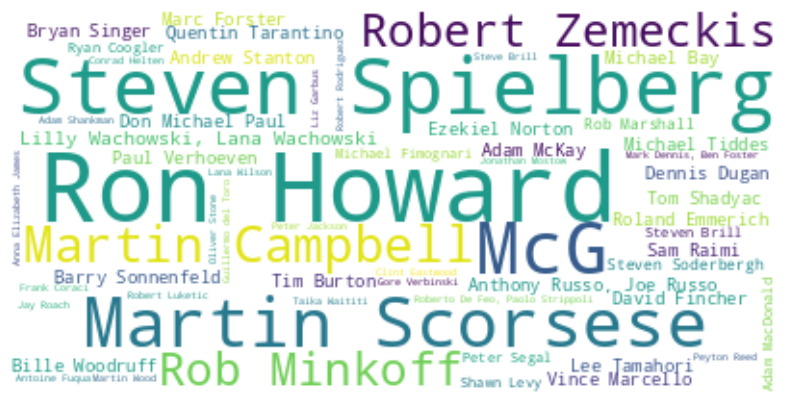

In [ ]:
from wordcloud import WordCloud

# Membuat DataFrame baru dengan mengelompokkan data berdasarkan kolom 'director' dan menghitung total budget ('budget_x') untuk setiap sutradara
director_budget_wise = data.groupby(by='director').agg(total=('budget_x', 'sum')).sort_values(by='total', ascending=False).reset_index()

# Mengonversi hasil pengelompokan ke dalam bentuk kamus (dictionary)
words = dict(director_budget_wise.values)

# Membuat WordCloud dengan maksimum 1000000 kata, latar belakang putih, dan menghasilkan dari frekuensi kata-kata
wordcloud = WordCloud(max_words=1000000, background_color='white').generate_from_frequencies(words)

# Membuat figure dengan ukuran 10x5 inci
plt.figure(figsize=(10, 5))

# Menampilkan WordCloud dengan interpolasi bilinear
plt.imshow(wordcloud, interpolation='bilinear')

# Menghilangkan sumbu pada plot
plt.axis('off')

# Menampilkan plot
plt.show()

In [ ]:
director_budget_wise.to_csv("director_budget_wise.csv", index = False)
!cp director_budget_wise.csv "drive/My Drive/dataset"

##Apakah ada artis yang sering bekerja sama di lebih dari 1 film?

In [ ]:
# Pecah kolom 'director' menjadi beberapa baris
data_director = data['director'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
data = data.drop('director', axis=1).join(data_director.rename('director'))

# Pecah kolom 'cast' menjadi beberapa baris
data_cast = data['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
data = data.drop('cast', axis=1).join(data_cast.rename('cast'))

# Filter data untuk menyertakan hanya baris dengan lebih dari satu film oleh artis dan sutradara
frequent_collaborators = data[data.duplicated(subset=['cast', 'director'], keep=False)]

# Menghitung kolaborasi unik artis-sutradara
collaboration_counts = frequent_collaborators.groupby(['cast', 'director']).size().reset_index(name='film_count')

# Sorting berdasarkan kolom 'film_count'
collaboration_counts_sorted = collaboration_counts.sort_values(by='film_count', ascending=False)

# Membuat visualisasi interaktif
fig = px.bar(collaboration_counts_sorted.head(100), # Menampilkan 100 teratas
             x='cast', # Menetapkan sumbu x
             y='film_count', # Menetapkan sumbu y
             color='director', # Setiap warna menunjukkan sutradara berbeda
             labels={'director': 'Sutradara', 'cast': 'Artis', 'film_count': 'Jumlah Film Bersama'}, # Penyesuaian label
             title='Artis dan Sutradara yang Sering Bekerja Sama', # Menetapkan judul plot
             color_continuous_scale=['#E50914', '#221F1F', '#F5F5F1', '#B20710', '#F2F2F2', '#E50914', '#B20710', '#F5F5F1', '#221F1F']) # Menentukan skala warna

# Atur legenda
fig.update_layout(legend_title_text='Sutradara', legend=dict(title_font=dict(size=12)))

# Tampilkan visualisasi interaktif
fig.show()

##Wawasan dari Data Artis dan Sutradara yang Sering Bekerja Sama di Lebih Dari 1 Film
Dari visualisasi kerja sama artis dan sutradara tersebut, kita dapat menarik beberapa wawasan:

* Dominasi Sutradara Wachowski:

> Lana Wachowski dan Lilly Wachowski menonjol sebagai sutradara dengan jumlah kolaborasi yang tinggi. Hugo Weaving memiliki 9 film bersama dengan Lana Wachowski dan 9 film bersama dengan Lilly Wachowski.

* Matrix Trilogy:

> Sejumlah besar kolaborasi terjadi dalam proyek-proyek khusus, seperti film-film dalam trilogy Matrix, di mana Laurence Fishburne, Keanu Reeves, Carrie-Anne Moss, dan Hugo Weaving bekerja bersama baik dengan Lana Wachowski maupun Lilly Wachowski.

* Kolaborasi Beragam:

> David Schwimmer dan Sacha Baron Cohen, bersama dengan beberapa artis lainnya, terlibat dalam proyek-proyek yang disutradarai oleh Tom McGrath, Eric Darnell, dan William Eubank, menunjukkan keragaman dalam kolaborasi mereka di berbagai genre dan gaya film.

* Jesse V. Johnson dan Scott Adkins:

> Jesse V. Johnson dan Scott Adkins memiliki kolaborasi yang signifikan (5 film), menunjukkan hubungan yang kuat antara sutradara dan aktor dalam menciptakan proyek-proyek film.

* Sutradara John G. Avildsen dan Ralph Macchio:

> John G. Avildsen dan Ralph Macchio memiliki kolaborasi dalam 4 film, menciptakan hubungan kerja yang berkelanjutan di beberapa proyek.

* Kolaborasi Antara Sutradara dan Artis yang Berbeda:

> Artis seperti Jada Pinkett Smith, Monica Bellucci, Gloria Foster, dan Martin Kove terlibat dalam proyek-proyek yang melibatkan berbagai sutradara, menunjukkan fleksibilitas mereka untuk bekerja di berbagai jenis proyek.

* Kolaborasi Sutradara Wachowski dengan Berbagai Artis:

> Lana Wachowski dan Lilly Wachowski bekerja dengan sejumlah artis seperti Laurence Fishburne, Keanu Reeves, Monica Bellucci, dan Lambert Wilson dalam beberapa proyek film.

Analisis ini memberikan gambaran tentang pola kolaborasi yang konsisten, proyek-proyek yang menonjol, dan keragaman dalam pilihan proyek di dunia perfilman Netflix. Analisis lebih lanjut dapat dilakukan untuk mendalami dampak dan keberhasilan proyek-proyek ini dari perspektif kritikus dan penonton.

##Buatkan peta negara yang nilainya berdasarkan bahasa asli film?

In [ ]:
import geopandas as gpd

# Memanggil data geometri dunia menggunakan pustaka geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Menggabungkan data geometri negara dengan data film berdasarkan kolom 'first_country'
merged_data = world.merge(data, left_on='name', right_on='first_country', how='left')

# Membuat peta interaktif menggunakan Plotly Express
fig = px.choropleth(merged_data, # Membuat peta berdasarkan data 'merged_data' yang sudah diproses sebelumnya
                    locations='iso_a3', # Menunjukkan kolom yang berisi kode iso_a3 untuk menentukan lokasi di peta
                    color='orig_lang', # Menetapkan kolom bahasa asli sebagai variabel warna pada peta
                    hover_name='first_country', # Menetapkan kolom yang akan ditampilkan saat mouse diarahkan ke suatu wilayah pada peta
                    title='Peta Bahasa Asli Film Berdasarkan Negara', # Menetapkan judul peta
                    color_discrete_sequence=px.colors.qualitative.Set1) # Menggunakan urutan warna diskrit dari palet warna qualitative 'Set1' untuk menunjukkan variasi bahasa

# Menampilkan peta
fig.show()

##Wawasan dari Peta Negara Berdasarkan Bahasa Asli Film
Wawasan dari peta tersebut dapat diambil dengan melihat distribusi bahasa dan negara di mana film-film tersebut tersedia:

* Bahasa dan Negara yang Paling Banyak Muncul:

> Bahasa Inggris memiliki prevalensi yang sangat tinggi, terutama di Amerika Serikat (704 film) dan Inggris (98 film).
Bahasa Prancis muncul di Prancis dan Inggris.
Bahasa Spanyol muncul di Argentina dan Meksiko.

* Distribusi Negara:

> Sebagian besar film dalam bahasa Inggris tersedia di Amerika Serikat, diikuti oleh Inggris, Kanada, dan beberapa negara lainnya.
Bahasa Prancis dan Spanyol lebih fokus pada negara asalnya (Prancis dan Argentina/Meksiko).

* Bahasa-Bahasa yang Banyak Digunakan Secara Global:

> Bahasa Inggris memiliki kehadiran global, muncul di banyak negara di seluruh dunia.
Bahasa Spanyol muncul di Argentina dan Meksiko, menunjukkan pengaruh yang signifikan di Amerika Latin.

* Varietas Bahasa di Negara Tertentu:

> Bahasa Inggris hadir di berbagai negara, termasuk Amerika Serikat, Inggris, Swiss, Serbia, Republik Ceko, Italia, Bulgaria, Finlandia, Rusia, Hungaria, dan Rumania.
Bahasa Spanyol muncul dalam varietas Spanyol dan di Argentina/Meksiko.

* Bahasa Minoritas:

> Beberapa bahasa seperti Hindi, Indonesia, Italia, Thailand, dan Malay muncul dalam jumlah yang lebih kecil tetapi menunjukkan keberagaman.

* Kehadiran Tunggal:

> Beberapa negara seperti Belgia, Belanda, Polandia, Denmark, Norwegia, Malaysia, Korea Selatan, dan India hanya memiliki satu film dalam dataset, menunjukkan Kehadiran Tunggal.

Wawasan ini memberikan gambaran tentang distribusi bahasa dan negara pada dataset film, serta mengidentifikasi dominasi bahasa tertentu di beberapa negara.